In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from matrix import *
from utils import *
from plot_utils import plot_spectrum_combined, get_esd_plot

In [3]:
num_iter = 20 # number of iterations for SLQ

#### Generate eigenvalues

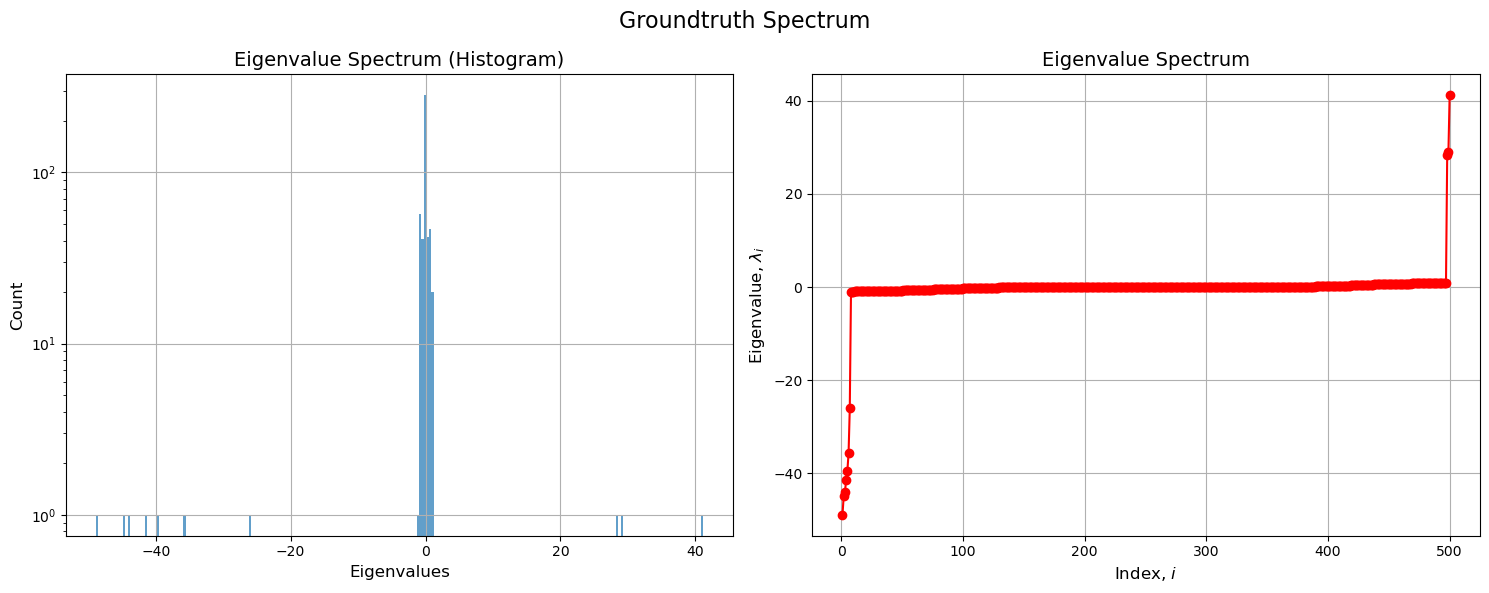

In [4]:
mtx_size = 500
num_bins = 250 # number of bins for the histograms
dict_eigenvalues = {
    'num_around_zero': 250,
    'around_zero_low': -1,
    'around_zero_high': 1,
    'num_pos_extremes': 10,
    'pos_low': 25,
    'pos_high': 50,
    'num_neg_extremes': 10,
    'neg_low': -50,
    'neg_high': -25
}
eigenvalues = generate_eigenvalues(mtx_size, dict_eigenvalues)
plot_spectrum_combined(eigenvalues.numpy(), num_bins=num_bins, title='Groundtruth Spectrum')

#### Matrix computation module

In [5]:
mtx = matrix(eigenvalues)

#### Sanity check

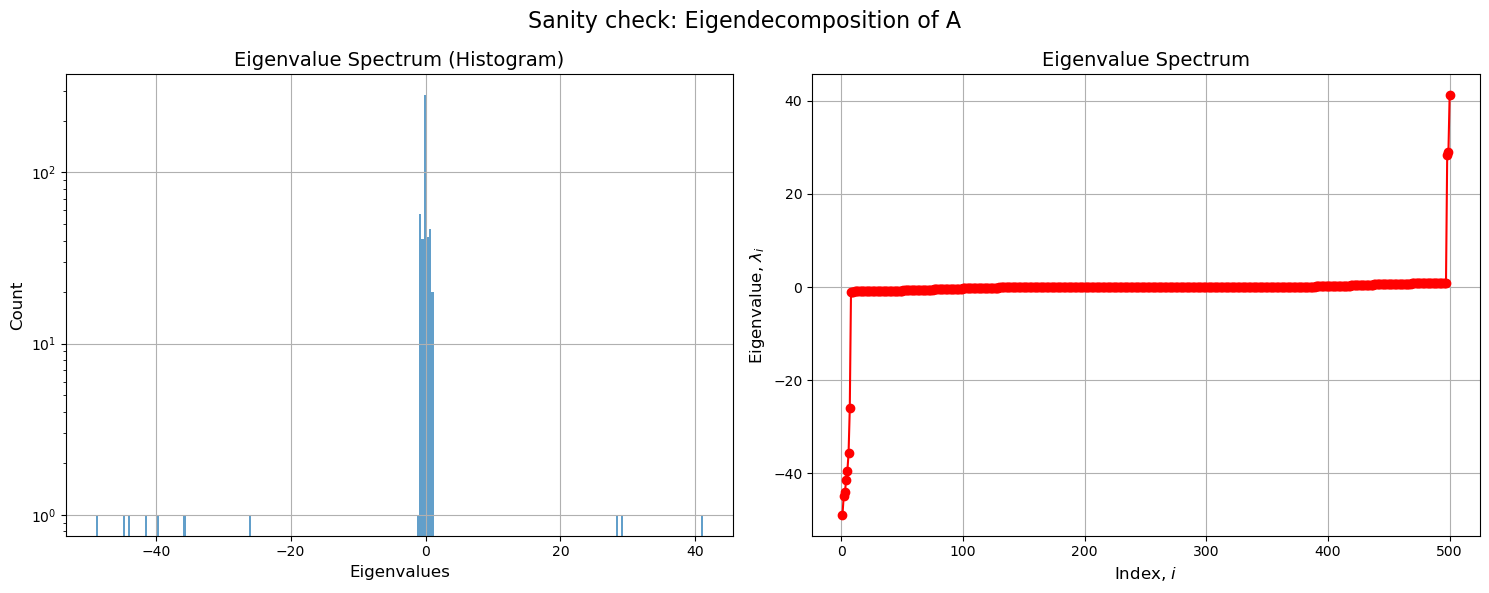

In [6]:
A = mtx.get_matrix() # form matrix from eigenvalues and u_vectors
eigenvalues_A, _ = torch.linalg.eig(A)
eigenvalues_A = eigenvalues_A.real  # cast to real numbers
plot_spectrum_combined(eigenvalues_A.numpy(), num_bins=num_bins, title='Sanity check: Eigendecomposition of A') 

#### Slow Lanczos algorithm

100%|██████████| 500/500 [00:05<00:00, 89.93it/s] 


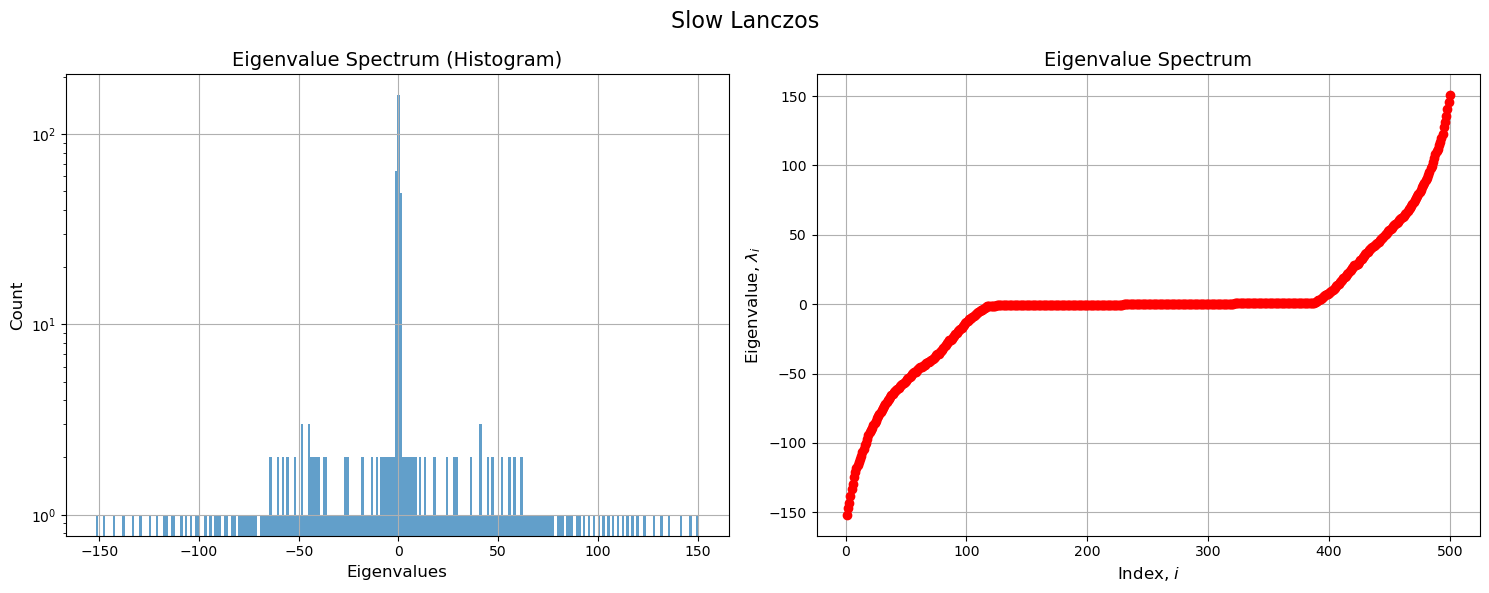

In [7]:
eigenvalues_slow_lanczos, _ = mtx.slow_lanczos(mtx_size)
plot_spectrum_combined(eigenvalues_slow_lanczos, num_bins=num_bins, title='Slow Lanczos')

#### Fast Lanczos algorithm

100%|██████████| 500/500 [00:04<00:00, 118.13it/s]


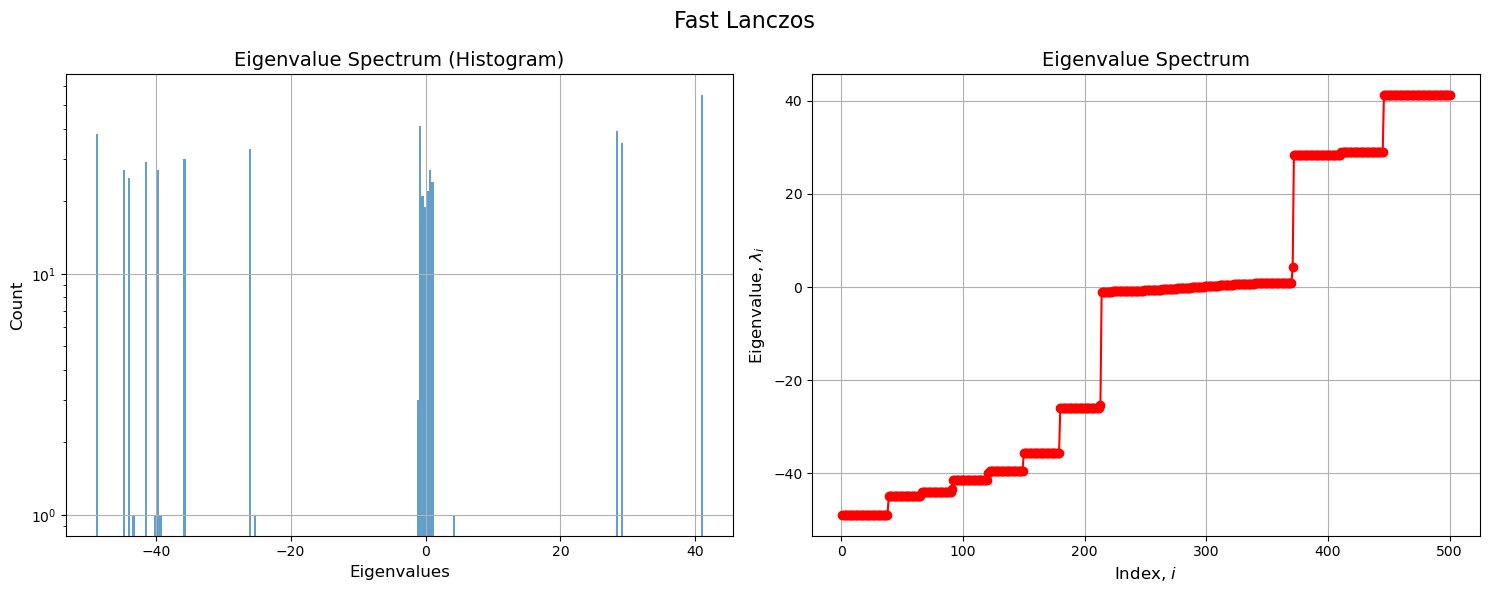

In [8]:
eigenvalues_fast_lanczos, _ =  mtx.fast_lanczos(mtx_size)
plot_spectrum_combined(eigenvalues_fast_lanczos, num_bins=num_bins, title='Fast Lanczos')

#### SLQ with Slow Lanczos algorithm

100%|██████████| 20/20 [00:00<00:00, 116.20it/s]


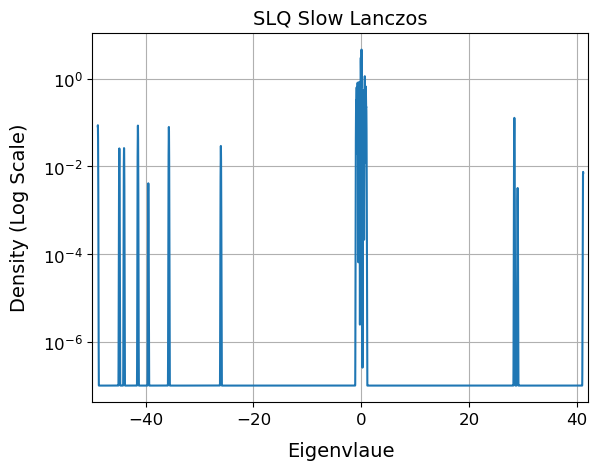

In [9]:
eigenvalues_SLQ_slow, weights_SLQ_slow = mtx.stochastic_lanczos_quadrature('slow', num_iter)
get_esd_plot(eigenvalues_SLQ_slow, weights_SLQ_slow, title='SLQ Slow Lanczos')

#### SLQ with Fast Lanczos algorithm

100%|██████████| 20/20 [00:00<00:00, 83.14it/s]


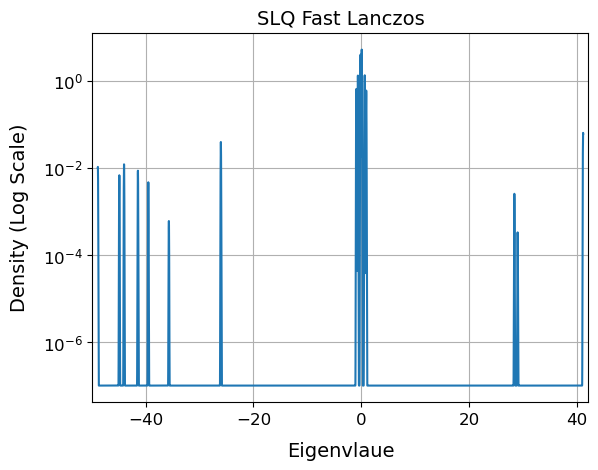

In [10]:
eigenvalues_SLQ_fast, weights_SLQ_fast = mtx.stochastic_lanczos_quadrature('fast', num_iter)
get_esd_plot(eigenvalues_SLQ_fast, weights_SLQ_fast, title='SLQ Fast Lanczos')